# LCS Demo 2

**LCS Workshop- Educational LCS - eLCS**

Outcome: *Learn the concept and use of Learning Classifier Systems *(*LCSs*)

Instructors: [Dr Ryan Urbanowicz](http://www.ryanurbanowicz.com/), [Dr Will Browne](http://ecs.victoria.ac.nz/Main/WillBrowne) And [Dr Karthik Kuber](http://kkuber.mysite.syr.edu/),

The following topics will be covered in a series of hands-on exercises and demonstrations:
1. LCS in a Nutshell 
2. LCS Concepts 
3. LCS Functional Cycle 
4. LCS Adaptability 
5. LCS Applications (toy and real problems) 

<p style="color:red;">Welcome to the Educational Learning Classifier System (eLCS).</p> 
It has the core elements of the functionality that help define the concept of LCSs. It’s the same family as the fully featured ExSTraCS system, so it is easy to transfer to a state-of-the-art LCS from this shallow learning curve.

eLCS complements the forthcoming *Textbook on Learning Classifier Systems*. Each demo is paired with one of the chapters in the textbook. Therefore, there are 5 different versions of an educational learning classiﬁer system (eLCS), as relevant functionality (code) is added to eLCS at each stage. This builds up the eLCS algorithm in its entirety from Demo 1 through to 5. Demo 6 showcases how ExSTraCS may be applied to a real-world data mining example, i.e. large scale bioinformatics. 

- Demo 1 Understanding of what an LCS is attempting – how does it classify the training data?
- **Demo 2 Matching and Covering**
- Demo 3 Prediction, Rule Population Evaluations, GA Rule Discovery and Parental Selection
- Demo 4 Deletion and Niche GA + Subsumption
- Demo 5 Complete eLCS applied to a complex (toy) problem
- Bonus Demo 6 ExSTraCS applied to a real-world data mining example 

All code is in Python. This newest version is coded in Python 3.4. Here it is to be run in the Jupyter platform (http://jupyter.org/), as it supports interactive data science.

Each demo version only includes the minimum code needed to perform the functions they were designed for. This way users can start by examining the simplest version of the code and progress onwards. The demo exercises are to implement several functions in eLCS and view results in spreadsheet, text ﬁle or Python based graphics (preferable).

## Set-up and introduction to Jupyter

Please see http://jupyter.org/ on how to set-up Jupyter with Python 3.
Please download eLCS_1.ipynb, … , eLCS_5.ipynb from Github 
Please see earlier demos for hide_code and initial introductions


 - Name:        eLCS_Run.py
 - Authors:     Ryan Urbanowicz - Written at Dartmouth College, Hanover, NH, USA
 - Contact:     ryan.j.urbanowicz@darmouth.edu
 - Created:     November 1, 2013
 - Description: To run e-LCS, run this module.  A properly formatted configuration file, including all run parameters must be included with the path to that file given below.  In this example, the configuration file has been included locally, so only the file name is required.
             
--------------------------------------------------------------------------------------------------------------------------------
eLCS: Educational Learning Classifier System - A basic LCS coded for educational purposes.  This LCS algorithm uses supervised learning, and thus is most 
similar to "UCS", an LCS algorithm published by Ester Bernado-Mansilla and Josep Garrell-Guiu (2003) which in turn is based heavily on "XCS", an LCS 
algorithm published by Stewart Wilson (1995).  

Copyright (C) 2013 Ryan Urbanowicz 
This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the 
Free Software Foundation; either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABLILITY 
or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, 
Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA


**2 LCS Concepts: Matching and Covering**
**2.1. Demo 2** (Code Demo: Matching and Covering) This ﬁrst implementation of eLCS is extremely basic. Each progressive version  includes the code to set run parameters, as well as code to manage an ofﬂine environment (load and manage a ﬁnite dataset). This ﬁrst version of eLCS, pretty much only includes the framework of an LCS, i.e. the code to form a population, a match set, a correct set (found in Classiﬁer Set cell), and to construct a classiﬁer (found in Classiﬁer Class cell). Because of their link we introduce both matching and covering together in this initial version. This version can be run from scratch, in which case covering will initially add rules to the population until some randomly generated set of covered rules, covers all instances in the dataset. The code is set to initially run from scratch for 64 iterations (i.e. one cycle through the dataset).

**2.2. Demo 2+ ** (*for those who finish 2 early*). Alternatively this version can reboot, i.e. load, an existing rule population, to demonstrate matching more completely. To reboot a population, go into the conﬁguration ﬁle and change doPopulationReboot from 0 to 1. In this case, covering will not kick in as all instances should already be covered. Instead, all matching rules will be displayed. Restarting the kernal and deleting 'ExampleRun_eLCS_LearnTrack.txt' before running will produce a clearer figure.

We have encoded this version to use print statements to show what’s going on in the algorithm regarding covering and matching. Each iteration, the dataset instance is displayed, followed by any matching rules, as well as any covered rules if covering is activated. The iteration ends with a print out of the iteration number, the current population size and the average rule generality in the population.


In [1]:
# Import useful prewritten code from Python libraries
import random
import copy
import math

Configure the parameters, usually from a txt file:

In [2]:
###### Configuration File (eLCS)
#     In the pure Python eLCS the list  'parameters[parameter] = value #Store parameters in a dictionary' is used 
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Major Run Parameters - Essential to be set correctly for a successful run of the algorithm
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
trainFile="6Multiplexer_Data_Complete.txt"		# Path/FileName of training dataset
testFile='None'									# Path/FileName of testing dataset.  If no testing data available or desired, put 'None'.  
outFileName="ExampleRun"							# Path/NewName for new algorithm output files. Note: Do not give a file extension, this is done automatically.
learningIterations=64						# Specify complete algorithm evaluation checkpoints and maximum number of learning iterations (e.g. 1000.2000.5000 = A maximum of 5000 learning iterations with evaluations at 1000, 2000, and 5000 iterations)
N=1000											# Maximum size of the rule population (a.k.a. Micro-classifier population size, where N is the sum of the classifier numerosities in the population)
p_spec=0.5										# The probability of specifying an attribute when covering. (1-p_spec = the probability of adding '#' in ternary rule representations). Greater numbers of attributes in a dataset will require lower values of p_spec.

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Logistical Run Parameters
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
randomSeed=False								# Set a constant random seed value to some integer (in order to obtain reproducible results). Put 'False' if none (for pseudo-random algorithm runs).
labelInstanceID="InstanceID"						# Label for the data column header containing instance ID's.  If included label not found, algorithm assumes that no instance ID's were included.
labelPhenotype="Class"							# Label for the data column header containing the phenotype label. (Typically 'Class' for case/control datasets)
labelMissingData="NA"								# Label used for any missing data in the data set.
discreteAttributeLimit=10						# The maximum number of attribute states allowed before an attribute or phenotype is considered to be continuous (Set this value >= the number of states for any discrete attribute or phenotype in their dataset).
trackingFrequency=1								# Specifies the number of iterations before each estimated learning progress report by the algorithm ('0' = report progress every epoch, i.e. every pass through all instances in the training data).

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### Supervised Learning Parameters - Generally just use default values.
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
nu=5											# (v) Power parameter used to determine the importance of high accuracy when calculating fitness. (typically set to 5, recommended setting of 1 in noisy data)
init_fit=0.01									# The initial fitness for a new classifier. (typically very small, approaching but not equal to zero)

######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
###### PopulationReboot - An option to begin e-LCS learning from an existing, saved rule population. Note that the training data is re-shuffled during a reboot.
######--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
doPopulationReboot=0							# Start eLCS from an existing rule population? (1 is True, 0 is False).
popRebootPath="ExampleRun_eLCS_5000"		

Create the constants that control the evolutionary process [i.e. the 'cons' object from Constants class]

In [3]:
class Constants:
    def setConstants(self):
        """ Takes the parameters parsed as a dictionary from eLCS_ConfigParser and saves them as global constants. """
        
        # Major Run Parameters -----------------------------------------------------------------------------------------
        self.trainFile = trainFile # par['trainFile']                                       #Saved as text
        self.testFile = testFile #par['testFile']                                         #Saved as text
        self.originalOutFileName = outFileName #str(par['outFileName'])                      #Saved as text
        self.outFileName = outFileName +'_eLCS'  #str(par['outFileName'])+'_eLCS'                  #Saved as text
        self.learningIterations = learningIterations #par['learningIterations']                     #Saved as text
        self.N = N #int(par['N'])                                                  #Saved as integer
        self.p_spec = p_spec # float(par['p_spec'])                                      #Saved as float
        
        # Logistical Run Parameters ------------------------------------------------------------------------------------
       # if par['randomSeed'] == 'False' or par['randomSeed'] == 'false':
        if randomSeed == False:
            self.useSeed = False                                                #Saved as Boolean
        else:
            self.useSeed = True                                                 #Saved as Boolean
            self.randomSeed = randomSeed #int(par['randomSeed'])                #Saved as integer
            
        self.labelInstanceID = labelInstanceID  #par['labelInstanceID']                           #Saved as text
        self.labelPhenotype = labelPhenotype # par['labelPhenotype']                             #Saved as text
        self.labelMissingData = labelMissingData  #par['labelMissingData']                         #Saved as text
        self.discreteAttributeLimit = discreteAttributeLimit # int(par['discreteAttributeLimit'])        #Saved as integer
        self.trackingFrequency = trackingFrequency  #int(par['trackingFrequency'])                  #Saved as integer
        
        # Supervised Learning Parameters -------------------------------------------------------------------------------
        self.nu = nu #int(par['nu'])                                                #Saved as integer
        self.init_fit = init_fit #float(par['init_fit'])                                  #Saved as float

        # PopulationReboot -------------------------------------------------------------------------------
        self.doPopulationReboot = doPopulationReboot # bool(int(par['doPopulationReboot']))          #Saved as Boolean
        self.popRebootPath = popRebootPath #par['popRebootPath']                               #Saved as text
        
        
    def referenceEnv(self, e):
        """ Store reference to environment object. """
        self.env = e
 
        
    def parseIterations(self):
        #""" Parse the 'learningIterations' string to identify the maximum number of learning iterations as well as evaluation checkpoints. """
        #checkpoints = self.learningIterations.split('.') 
        
        #for i in range(len(checkpoints)): 
           # checkpoints[i] = int(checkpoints[i])
            
        # self.learningCheckpoints = checkpoints #next two lines needed for reboot
        # self.maxLearningIterations = self.learningCheckpoints[(len(self.learningCheckpoints)-1)] #???

        self.learningCheckpoints = 64
        self.maxLearningIterations = learningIterations
        
        if self.trackingFrequency == 0:
            self.trackingFrequency = self.env.formatData.numTrainInstances  #Adjust tracking frequency to match the training data size - learning tracking occurs once every epoch


In [4]:

#To access one of the above constant values from another module, import GHCS_Constants * and use "cons.something"
cons = Constants() 
cons.setConstants() #Store run parameters in the 'Constants' module.
cons.parseIterations() #Store run parameters in the 'Constants' module.
#print(cons.maxLearningIterations)

Data management, e.g. load data from a file

In [5]:
class DataManagement:
    def __init__(self, trainFile, testFile, infoList = None):
        #Set random seed if specified.-----------------------------------------------
        if cons.useSeed:
            random.seed(cons.randomSeed)
        else:
            random.seed(None)

        #Initialize global variables-------------------------------------------------
        self.numAttributes = None       # The number of attributes in the input file. 
        self.areInstanceIDs = False     # Does the dataset contain a column of Instance IDs? (If so, it will not be included as an attribute)
        self.instanceIDRef = None       # The column reference for Instance IDs
        self.phenotypeRef = None        # The column reference for the Class/Phenotype column
        self.discretePhenotype = True   # Is the Class/Phenotype Discrete? (False = Continuous)
        self.attributeInfo = []         # Stores Discrete (0) or Continuous (1) for each attribute
        self.phenotypeList = []         # Stores all possible discrete phenotype states/classes or maximum and minimum values for a continuous phenotype
        self.phenotypeRange = None      # Stores the difference between the maximum and minimum values for a continuous phenotype
        
        #Train/Test Specific-----------------------------------------------------------------------------
        self.trainHeaderList = []       # The dataset column headers for the training data
        self.testHeaderList = []        # The dataset column headers for the testing data
        self.numTrainInstances = None   # The number of instances in the training data
        self.numTestInstances = None    # The number of instances in the testing data
        
        print("----------------------------------------------------------------------------")
        print("Environment: Formatting Data... ")
        
        #Detect Features of training data--------------------------------------------------------------------------
        rawTrainData = self.loadData(trainFile, True) #Load the raw data.

        self.characterizeDataset(rawTrainData)  #Detect number of attributes, instances, and reference locations.
        
        if cons.testFile == 'None': #If no testing data is available, formatting relies solely on training data.
            data4Formating = rawTrainData
        else:
            rawTestData = self.loadData(testFile, False) #Load the raw data.
            self.compareDataset(rawTestData) #Ensure that key features are the same between training and testing datasets.
            data4Formating = rawTrainData + rawTestData #Merge Training and Testing datasets

        self.discriminatePhenotype(data4Formating) #Determine if endpoint/phenotype is discrete or continuous.
        if self.discretePhenotype:
            self.discriminateClasses(data4Formating) #Detect number of unique phenotype identifiers.
        else:
            self.characterizePhenotype(data4Formating)
            
        self.discriminateAttributes(data4Formating) #Detect whether attributes are discrete or continuous.
        self.characterizeAttributes(data4Formating) #Determine potential attribute states or ranges.
        
        #Format and Shuffle Datasets----------------------------------------------------------------------------------------
        if cons.testFile != 'None':
            self.testFormatted = self.formatData(rawTestData) #Stores the formatted testing data set used throughout the algorithm.

        self.trainFormatted = self.formatData(rawTrainData) #Stores the formatted training data set used throughout the algorithm.       
        print("----------------------------------------------------------------------------")

        
    def loadData(self, dataFile, doTrain):
        """ Load the data file. """     
        print("DataManagement: Loading Data... " + str(dataFile))
        datasetList = []
        try:       
            f = open(dataFile,'r')
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', dataFile)
            raise
            
        else:
            if doTrain:
                self.trainHeaderList = f.readline().rstrip('\n').split('\t')   #strip off first row
            else:
                self.testHeaderList = f.readline().rstrip('\n').split('\t')   #strip off first row
            for line in f:
                lineList = line.strip('\n').split('\t')
                datasetList.append(lineList)
            f.close()

        return datasetList
    
    
    def characterizeDataset(self, rawTrainData):
        " Detect basic dataset parameters " 
        #Detect Instance ID's and save location if they occur.  Then save number of attributes in data.
        if cons.labelInstanceID in self.trainHeaderList:
            self.areInstanceIDs = True
            self.instanceIDRef = self.trainHeaderList.index(cons.labelInstanceID)
            print("DataManagement: Instance ID Column location = "+str(self.instanceIDRef))
            self.numAttributes = len(self.trainHeaderList)-2 #one column for InstanceID and another for the phenotype.
        else:
            self.numAttributes = len(self.trainHeaderList)-1
        
        #Identify location of phenotype column
        if cons.labelPhenotype in self.trainHeaderList:
            self.phenotypeRef = self.trainHeaderList.index(cons.labelPhenotype)
            print("DataManagement: Phenotype Column Location = "+str(self.phenotypeRef))
        else:
            print("DataManagement: Error - Phenotype column not found!  Check data set to ensure correct phenotype column label, or inclusion in the data.")

        #Adjust training header list to just include attributes labels
        if self.areInstanceIDs:
            if self.phenotypeRef > self.instanceIDRef:
                self.trainHeaderList.pop(self.phenotypeRef)
                self.trainHeaderList.pop(self.instanceIDRef)
            else:
                self.trainHeaderList.pop(self.instanceIDRef)
                self.trainHeaderList.pop(self.phenotypeRef)
        else:
            self.trainHeaderList.pop(self.phenotypeRef)
        
        #Store number of instances in training data
        self.numTrainInstances = len(rawTrainData)
        print("DataManagement: Number of Attributes = " + str(self.numAttributes)) 
        print("DataManagement: Number of Instances = " + str(self.numTrainInstances)) 


    def discriminatePhenotype(self, rawData):
        """ Determine whether the phenotype is Discrete(class-based) or Continuous """
        print("DataManagement: Analyzing Phenotype...")
        inst = 0
        classDict = {}
        while self.discretePhenotype and len(list(classDict.keys())) <= cons.discreteAttributeLimit and inst < self.numTrainInstances:  #Checks which discriminate between discrete and continuous attribute
            target = rawData[inst][self.phenotypeRef]
            if target in list(classDict.keys()):  #Check if we've seen this attribute state yet.
                classDict[target] += 1
            elif target == cons.labelMissingData: #Ignore missing data
                print("DataManagement: Warning - Individual detected with missing phenotype information!")
                pass
            else: #New state observed
                classDict[target] = 1
            inst += 1

        if len(list(classDict.keys())) > cons.discreteAttributeLimit:
            self.discretePhenotype = False
            self.phenotypeList = [float(target),float(target)]
            print("DataManagement: Phenotype Detected as Continuous.")
        else:
            print("DataManagement: Phenotype Detected as Discrete.")
            
    
    def discriminateClasses(self, rawData):
        """ Determines number of classes and their identifiers. Only used if phenotype is discrete. """
        print("DataManagement: Detecting Classes...")
        inst = 0
        classCount = {}
        while inst < self.numTrainInstances:
            target = rawData[inst][self.phenotypeRef]
            if target in self.phenotypeList:
                classCount[target] += 1 
            else:
                self.phenotypeList.append(target)
                classCount[target] = 1
            inst += 1
        print("DataManagement: Following Classes Detected:" + str(self.phenotypeList))
        for each in list(classCount.keys()):
            print("Class: "+str(each)+ " count = "+ str(classCount[each]))
            
                     
    def compareDataset(self, rawTestData):
        " Ensures that the attributes in the testing data match those in the training data.  Also stores some information about the testing data. "
        if self.areInstanceIDs:
            if self.phenotypeRef > self.instanceIDRef:
                self.testHeaderList.pop(self.phenotypeRef)
                self.testHeaderList.pop(self.instanceIDRef)
            else:
                self.testHeaderList.pop(self.instanceIDRef)
                self.testHeaderList.pop(self.phenotypeRef)
        else:
            self.testHeaderList.pop(self.phenotypeRef)
            
        if self.trainHeaderList != self.testHeaderList:
            print("DataManagement: Error - Training and Testing Dataset Headers are not equivalent")

        # Stores the number of instances in the testing data.
        self.numTestInstances = len(rawTestData)
        print("DataManagement: Number of Attributes = " + str(self.numAttributes)) 
        print("DataManagement: Number of Instances = " + str(self.numTestInstances)) 


    def discriminateAttributes(self, rawData):
        """ Determine whether attributes in dataset are discrete or continuous and saves this information. """
        print("DataManagement: Detecting Attributes...")
        self.discreteCount = 0
        self.continuousCount = 0
        for att in range(len(rawData[0])):
            if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                attIsDiscrete = True
                inst = 0
                stateDict = {}
                while attIsDiscrete and len(list(stateDict.keys())) <= cons.discreteAttributeLimit and inst < self.numTrainInstances:  #Checks which discriminate between discrete and continuous attribute
                    target = rawData[inst][att]
                    if target in list(stateDict.keys()):  #Check if we've seen this attribute state yet.
                        stateDict[target] += 1
                    elif target == cons.labelMissingData: #Ignore missing data
                        pass
                    else: #New state observed
                        stateDict[target] = 1
                    inst += 1

                if len(list(stateDict.keys())) > cons.discreteAttributeLimit:
                    attIsDiscrete = False
                if attIsDiscrete:
                    self.attributeInfo.append([0,[]])    
                    self.discreteCount += 1
                else:
                    self.attributeInfo.append([1,[float(target),float(target)]])   #[min,max]
                    self.continuousCount += 1
        print("DataManagement: Identified "+str(self.discreteCount)+" discrete and "+str(self.continuousCount)+" continuous attributes.") #Debug

            
    def characterizeAttributes(self, rawData):
        """ Determine range (if continuous) or states (if discrete) for each attribute and saves this information"""
        print("DataManagement: Characterizing Attributes...")
        attributeID = 0
        for att in range(len(rawData[0])):
            if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                for inst in range(len(rawData)):
                    target = rawData[inst][att]
                    if not self.attributeInfo[attributeID][0]: #If attribute is discrete
                        if target in self.attributeInfo[attributeID][1] or target == cons.labelMissingData:
                            pass  #NOTE: Could potentially store state frequency information to guide learning.
                        else:
                            self.attributeInfo[attributeID][1].append(target)
                    else: #If attribute is continuous
                        
                        #Find Minimum and Maximum values for the continuous attribute so we know the range.
                        if target == cons.labelMissingData:
                            pass
                        elif float(target) > self.attributeInfo[attributeID][1][1]:  #error
                            self.attributeInfo[attributeID][1][1] = float(target)
                        elif float(target) < self.attributeInfo[attributeID][1][0]:
                            self.attributeInfo[attributeID][1][0] = float(target)
                        else:
                            pass
                attributeID += 1
                

    def characterizePhenotype(self, rawData):
        """ Determine range of phenotype values. """
        print("DataManagement: Characterizing Phenotype...")
        for inst in range(len(rawData)):
            target = rawData[inst][self.phenotypeRef]
            
            #Find Minimum and Maximum values for the continuous phenotype so we know the range.
            if target == cons.labelMissingData:
                pass
            elif float(target) > self.phenotypeList[1]:  
                self.phenotypeList[1] = float(target)
            elif float(target) < self.phenotypeList[0]:
                self.phenotypeList[0] = float(target)
            else:
                pass
        self.phenotypeRange = self.phenotypeList[1] - self.phenotypeList[0]
                
            
    def formatData(self,rawData):
        """ Get the data into a format convenient for the algorithm to interact with. Specifically each instance is stored in a list as follows; [Attribute States, Phenotype, InstanceID] """
        formatted = []
        #Initialize data format---------------------------------------------------------
        for i in range(len(rawData)):  
            formatted.append([None,None,None]) #[Attribute States, Phenotype, InstanceID]

        for inst in range(len(rawData)):
            stateList = []
            attributeID = 0
            for att in range(len(rawData[0])):
                if att != self.instanceIDRef and att != self.phenotypeRef:  #Get just the attribute columns (ignores phenotype and instanceID columns)
                    target = rawData[inst][att]
                    
                    if self.attributeInfo[attributeID][0]: #If the attribute is continuous
                        if target == cons.labelMissingData:
                            stateList.append(target) #Missing data saved as text label
                        else:
                            stateList.append(float(target)) #Save continuous data as floats. 
                    else: #If the attribute is discrete - Format the data to correspond to the GABIL (DeJong 1991)
                        stateList.append(target) #missing data, and discrete variables, all stored as string objects   
                    attributeID += 1
            
            #Final Format-----------------------------------------------
            formatted[inst][0] = stateList                           #Attribute states stored here
            if self.discretePhenotype:
                formatted[inst][1] = rawData[inst][self.phenotypeRef]        #phenotype stored here
            else:
                formatted[inst][1] = float(rawData[inst][self.phenotypeRef])
            if self.areInstanceIDs:
                formatted[inst][2] = rawData[inst][self.instanceIDRef]   #Instance ID stored here
            else:
                pass    #instance ID neither given nor required.
            #-----------------------------------------------------------
        random.shuffle(formatted) #One time randomization of the order the of the instances in the data, so that if the data was ordered by phenotype, this potential learning bias (based on instance ordering) is eliminated.  
        return formatted
    

Offline environment: class to cycle through an offline dataset

In [6]:

class Offline_Environment:
    def __init__(self):
        #Initialize global variables-------------------------------------------------
        self.dataRef = 0
        self.storeDataRef = 0
        self.formatData = DataManagement(cons.trainFile, cons.testFile)
        
        #Initialize the first dataset instance to be passed to eLCS
        self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
        self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
        if cons.testFile == 'None':
            pass
        else:
            self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
            self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]
        

    def getTrainInstance(self):
        """ Returns the current training instance. """ 
        return [self.currentTrainState, self.currentTrainPhenotype]
        
        
    def getTestInstance(self):
        """ Returns the current training instance. """
        return [self.currentTestState, self.currentTestPhenotype]
    
    
    def newInstance(self, isTraining): 
        """  Shifts the environment to the next instance in the data. """
        #-------------------------------------------------------
        # Training Data
        #-------------------------------------------------------
        if isTraining: 
            if self.dataRef < (self.formatData.numTrainInstances-1):
                self.dataRef += 1
                self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
                self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
            else:  #Once learning has completed an epoch (i.e. a cycle of iterations though the entire training dataset) it starts back at the first instance in the data)
                self.resetDataRef(isTraining)
                
        #-------------------------------------------------------
        # Testing Data
        #-------------------------------------------------------
        else:
            if self.dataRef < (self.formatData.numTestInstances-1):
                self.dataRef += 1
                self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
                self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]
      
      
    def resetDataRef(self, isTraining):
        """ Resets the environment back to the first instance in the current data set. """
        self.dataRef = 0 
        if isTraining:
            self.currentTrainState = self.formatData.trainFormatted[self.dataRef][0]
            self.currentTrainPhenotype = self.formatData.trainFormatted[self.dataRef][1]
        else:
            self.currentTestState = self.formatData.testFormatted[self.dataRef][0]
            self.currentTestPhenotype = self.formatData.testFormatted[self.dataRef][1]


    def startEvaluationMode(self):
        """ Turns on evaluation mode.  Saves the instance we left off in the training data. """
        self.storeDataRef = self.dataRef
        
        
    def stopEvaluationMode(self):
        """ Turns off evaluation mode.  Re-establishes place in dataset."""
        self.dataRef = self.storeDataRef

Classifier class! Worth reading :)

In [7]:
class Classifier:
    def __init__(self,a=None,b=None,c=None,d=None):
        #Major Parameters --------------------------------------------------
        self.specifiedAttList = []      # Attribute Specified in classifier: Similar to Bacardit 2009 - ALKR + GABIL, continuous and discrete rule representation
        self.condition = []             # States of Attributes Specified in classifier: Similar to Bacardit 2009 - ALKR + GABIL, continuous and discrete rule representation
        self.phenotype = None           # Class if the endpoint is discrete, and a continuous phenotype if the endpoint is continuous
        
        self.fitness = cons.init_fit    # Classifier fitness - initialized to a constant initial fitness value
        self.accuracy = 0.0             # Classifier accuracy - Accuracy calculated using only instances in the dataset which this rule matched.
        
        #Experience Management ---------------------------------------------
        self.initTimeStamp = None       # Iteration in which the rule first appeared.
        
        #Classifier Accuracy Tracking --------------------------------------
        self.matchCount = 0             # Known in many LCS implementations as experience i.e. the total number of times this classifier was in a match set
        self.correctCount = 0           # The total number of times this classifier was in a correct set
        
        if isinstance(b,list):
            self.classifierCovering(a,b,c)
        elif isinstance(a,Classifier):
            self.classifierCopy(a, b)
        elif isinstance(a,list) and b == None:
            self.rebootClassifier(a)
        else:
            print("Classifier: Error building classifier.")
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # CLASSIFIER CONSTRUCTION METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------       
    def classifierCovering(self, exploreIter, state, phenotype):
        """ Makes a new classifier when the covering mechanism is triggered.  The new classifier will match the current training instance. 
        Covering will NOT produce a default rule (i.e. a rule with a completely general condition). """
        #Initialize new classifier parameters----------
        self.initTimeStamp = exploreIter
        dataInfo = cons.env.formatData
        #-------------------------------------------------------
        # DISCRETE PHENOTYPE
        #-------------------------------------------------------
        if dataInfo.discretePhenotype: 
            self.phenotype = phenotype
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        else:
            phenotypeRange = dataInfo.phenotypeList[1] - dataInfo.phenotypeList[0]
            rangeRadius = random.randint(25,75)*0.01*phenotypeRange / 2.0 #Continuous initialization domain radius.
            Low = float(phenotype) - rangeRadius
            High = float(phenotype) + rangeRadius
            self.phenotype = [Low,High] #ALKR Representation, Initialization centered around training instance  with a range between 25 and 75% of the domain size.      
        #-------------------------------------------------------
        # GENERATE MATCHING CONDITION
        #-------------------------------------------------------
        while len(self.specifiedAttList) < 1:
            for attRef in range(len(state)):
                if random.random() < cons.p_spec and state[attRef] != cons.labelMissingData:
                    self.specifiedAttList.append(attRef)
                    self.condition.append(self.buildMatch(attRef, state))
        
        
    def rebootClassifier(self, classifierList): 
        """ Rebuilds a saved classifier as part of the population Reboot """
        numAttributes = cons.env.formatData.numAttributes
        attInfo = cons.env.formatData.attributeInfo
        for attRef in range(0,numAttributes):
            if classifierList[attRef] != '#':  #Attribute in rule is not wild
                if attInfo[attRef][0]: #Continuous Attribute
                    valueRange = classifierList[attRef].split(';')
                    self.condition.append(valueRange)
                    self.specifiedAttList.append(attRef)
                else:
                    self.condition.append(classifierList[attRef])
                    self.specifiedAttList.append(attRef)
        #-------------------------------------------------------
        # DISCRETE PHENOTYPE
        #-------------------------------------------------------
        if cons.env.formatData.discretePhenotype: 
            self.phenotype = str(classifierList[numAttributes])
        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        else:
            self.phenotype = classifierList[numAttributes].split(';')
            for i in range(2): 
                self.phenotype[i] = float(self.phenotype[i])

        self.fitness = float(classifierList[numAttributes+1])
        self.accuracy = float(classifierList[numAttributes+2])
        self.initTimeStamp = int(classifierList[numAttributes+6])
        
        self.correctCount = int(classifierList[numAttributes+9])
        self.matchCount = int(classifierList[numAttributes+10])


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # MATCHING
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  
    def match(self, state):
        """ Returns if the classifier matches in the current situation. """ 
        for i in range(len(self.condition)):
            attributeInfo = cons.env.formatData.attributeInfo[self.specifiedAttList[i]]
            #-------------------------------------------------------
            # CONTINUOUS ATTRIBUTE
            #-------------------------------------------------------
            if attributeInfo[0]:
                instanceValue = state[self.specifiedAttList[i]]
                if self.condition[i][0] < instanceValue < self.condition[i][1] or instanceValue == cons.labelMissingData:
                    pass
                else:
                    return False  
            #-------------------------------------------------------
            # DISCRETE ATTRIBUTE
            #-------------------------------------------------------
            else:
                stateRep = state[self.specifiedAttList[i]]  
                if stateRep == self.condition[i] or stateRep == cons.labelMissingData:
                    pass
                else:
                    return False 
        return True
        
   
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  
    def buildMatch(self, attRef, state):
        """ Builds a matching condition for the classifierCovering method. """
        attributeInfo = cons.env.formatData.attributeInfo[attRef]
        #-------------------------------------------------------
        # CONTINUOUS ATTRIBUTE
        #-------------------------------------------------------
        if attributeInfo[0]:
            attRange = attributeInfo[1][1] - attributeInfo[1][0]
            rangeRadius = random.randint(25,75)*0.01*attRange / 2.0 #Continuous initialization domain radius.
            Low = state[attRef] - rangeRadius
            High = state[attRef] + rangeRadius
            condList = [Low,High] #ALKR Representation, Initialization centered around training instance  with a range between 25 and 75% of the domain size.
        #-------------------------------------------------------
        # DISCRETE ATTRIBUTE
        #-------------------------------------------------------
        else: 
            condList = state[attRef] #State already formatted like GABIL in DataManagement
            
        return condList
     

    def equals(self, cl):  
        """ Returns if the two classifiers are identical in condition and phenotype. This works for discrete or continuous attributes or phenotypes. """ 
        if cl.phenotype == self.phenotype and len(cl.specifiedAttList) == len(self.specifiedAttList): #Is phenotype the same and are the same number of attributes specified - quick equality check first.
            clRefs = sorted(cl.specifiedAttList)
            selfRefs = sorted(self.specifiedAttList)
            if clRefs == selfRefs:
                for i in range(len(cl.specifiedAttList)):
                    tempIndex = self.specifiedAttList.index(cl.specifiedAttList[i])
                    if cl.condition[i] == self.condition[tempIndex]:
                        pass
                    else:
                        return False
                return True
        return False


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # PARAMETER UPDATES
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------        
    def updateAccuracy(self):
        """ Update the accuracy tracker """
        self.accuracy = self.correctCount / float(self.matchCount)
        
        
    def updateFitness(self):
        """ Update the fitness parameter. """ 
        if cons.env.formatData.discretePhenotype or (self.phenotype[1]-self.phenotype[0])/cons.env.formatData.phenotypeRange < 0.5:
            self.fitness = pow(self.accuracy, cons.nu)
        else:
            if (self.phenotype[1]-self.phenotype[0]) >= cons.env.formatData.phenotypeRange:
                self.fitness = 0.0
            else:
                self.fitness = math.fabs(pow(self.accuracy, cons.nu) - (self.phenotype[1]-self.phenotype[0])/cons.env.formatData.phenotypeRange)

        
    def updateExperience(self):
        """ Increases the experience of the classifier by one. Once an epoch has completed, rule accuracy can't change."""
        self.matchCount += 1 


    def updateCorrect(self):
        """ Increases the correct phenotype tracking by one. Once an epoch has completed, rule accuracy can't change."""
        self.correctCount += 1 

        
    def setAccuracy(self,acc):
        """ Sets the accuracy of the classifier """
        self.accuracy = acc
        
        
    def setFitness(self, fit):
        """  Sets the fitness of the classifier. """
        self.fitness = fit
        
    def reportClassifier(self):
        """  Transforms the rule representation used to a more standard readable format. """
        numAttributes = cons.env.formatData.numAttributes
        thisClassifier = []
        counter = 0
        for i in range(numAttributes):
            if i in self.specifiedAttList:
                thisClassifier.append(self.condition[counter])
                counter += 1
            else:
                thisClassifier.append('#')
        return thisClassifier

Classifier Set class, again a must read :)

In [8]:

class ClassifierSet:
    def __init__(self, a=None):
        """ Overloaded initialization: Handles creation of a new population or a rebooted population (i.e. a previously saved population). """
        # Major Parameters
        self.popSet = []        # List of classifiers/rules
        self.matchSet = []      # List of references to rules in population that match
        self.correctSet = []    # List of references to rules in population that both match and specify correct phenotype
        self.microPopSize = 0   # Tracks the current micro population size 
        
        # Evaluation Parameters-------------------------------
        self.aveGenerality = 0.0
        self.expRules = 0.0
        self.attributeSpecList = []
        self.attributeAccList = []
        self.avePhenotypeRange = 0.0

        # Set Constructors-------------------------------------
        if a==None:
            self.makePop() #Initialize a new population
        elif isinstance(a,str):
            self.rebootPop(a) #Initialize a population based on an existing saved rule population
        else:
            print("ClassifierSet: Error building population.")
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # POPULATION CONSTRUCTOR METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def makePop(self):
        """ Initializes the rule population """
        self.popSet = []
            
            
    def rebootPop(self, remakeFile):
        """ Remakes a previously evolved population from a saved text file. """
        print("Rebooting the following population: " + str(remakeFile)+"_RulePop.txt")
        #*******************Initial file handling**********************************************************
        try:       
            datasetList = []
            f = open(remakeFile+"_RulePop.txt", 'r')
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', remakeFile+"_RulePop.txt")
            raise
        else:
            self.headerList = f.readline().rstrip('\n').split('\t')   #strip off first row
            for line in f:
                lineList = line.strip('\n').split('\t')
                datasetList.append(lineList)
            f.close()    
            
        #**************************************************************************************************
        for each in datasetList:
            cl = Classifier(each)
            self.popSet.append(cl) 
            self.microPopSize += 1
        print("Rebooted Rule Population has "+str(len(self.popSet))+" Macro Pop Size.")
        
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # CLASSIFIER SET CONSTRUCTOR METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def makeMatchSet(self, state_phenotype, exploreIter):
        """ Constructs a match set from the population. Covering is initiated if the match set is empty or a rule with the current correct phenotype is absent. """ 
        #BREAK 2 DEMO CODE-------------------------
        print("Current instance from dataset:  " + "State = "+ str(state_phenotype[0]) + "  Phenotype = "+ str(state_phenotype[1]))
        print("--------------------------------------------------------------------------------------")
        print("Matching Classifiers:")
        #------------------------------------------
        #Initial values
        state = state_phenotype[0]
        phenotype = state_phenotype[1]
        doCovering = True # Covering check: Twofold (1)checks that a match is present, and (2) that at least one match dictates the correct phenotype.
        
        #-------------------------------------------------------
        # MATCHING
        #-------------------------------------------------------
        for i in range(len(self.popSet)):           # Go through the population
            cl = self.popSet[i]                     # One classifier at a time
            if cl.match(state):                     # Check for match
                #BREAK 2 DEMO CODE-------------------------
                print("Condition: "+ str(cl.reportClassifier()) + "  Phenotype: "+ str(cl.phenotype))
                #------------------------------------------
                self.matchSet.append(i)             # If match - add classifier to match set
                
                #Covering Check--------------------------------------------------------    
                if cons.env.formatData.discretePhenotype:   # Discrete phenotype     
                    if cl.phenotype == phenotype:           # Check for phenotype coverage
                        doCovering = False
                else:                                                                           # Continuous phenotype
                    if float(cl.phenotype[0]) <= float(phenotype) <= float(cl.phenotype[1]):    # Check for phenotype coverage
                        doCovering = False
        if len(self.matchSet) == 0:
            print('None found.')
        #-------------------------------------------------------
        # COVERING
        #-------------------------------------------------------
        while doCovering:
            newCl = Classifier(exploreIter, state, phenotype)
            #BREAK 2 DEMO CODE-------------------------
            print("Covering Activated:")
            print("Condition: "+ str(newCl.reportClassifier()) + "  Phenotype: "+ str(newCl.phenotype))
            #------------------------------------------
            self.addClassifierToPopulation(newCl)
            self.matchSet.append(len(self.popSet)-1)  # Add covered classifier to matchset
            doCovering = False
        
        
    def makeCorrectSet(self, phenotype):
        """ Constructs a correct set out of the given match set. """      
        for i in range(len(self.matchSet)):
            ref = self.matchSet[i]
            #-------------------------------------------------------
            # DISCRETE PHENOTYPE
            #-------------------------------------------------------
            if cons.env.formatData.discretePhenotype: 
                if self.popSet[ref].phenotype == phenotype:
                    self.correctSet.append(ref) 
            #-------------------------------------------------------
            # CONTINUOUS PHENOTYPE
            #-------------------------------------------------------
            else: 
                if float(phenotype) <= float(self.popSet[ref].phenotype[1]) and float(phenotype) >= float(self.popSet[ref].phenotype[0]):
                    self.correctSet.append(ref)

    
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER KEY METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def addClassifierToPopulation(self, cl):
        """ Adds a classifier to the set and increases the microPopSize value accordingly."""
        self.popSet.append(cl)
        self.microPopSize += 1
            

    def updateSets(self, exploreIter):
        """ Updates all relevant parameters in the current match and correct sets. """
        for ref in self.matchSet:
            self.popSet[ref].updateExperience()    
            if ref in self.correctSet:
                self.popSet[ref].updateCorrect()

            self.popSet[ref].updateAccuracy()
            self.popSet[ref].updateFitness()


    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # OTHER METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def setIterStamps(self, exploreIter):
        """ Sets the time stamp of all classifiers in the set to the current time. The current time
        is the number of exploration steps executed so far.  """
        for i in range(len(self.correctSet)):
            ref = self.correctSet[i]
            self.popSet[ref].updateTimeStamp(exploreIter)
            
     
    def clearSets(self):
        """ Clears out references in the match and correct sets for the next learning iteration. """
        self.matchSet = []
        self.correctSet = []
        
            
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # EVALUTATION METHODS
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    def runPopAveEval(self, exploreIter):
        """ Calculates some summary evaluations across the rule population including average generality. """
        genSum = 0
        agedCount = 0
        for cl in self.popSet:
            genSum += ((cons.env.formatData.numAttributes - len(cl.condition)) / float(cons.env.formatData.numAttributes)) 
        if self.microPopSize == 0:
            self.aveGenerality = 'NA'
        else:
            self.aveGenerality = genSum / float(self.microPopSize) 

        #-------------------------------------------------------
        # CONTINUOUS PHENOTYPE
        #-------------------------------------------------------
        if not cons.env.formatData.discretePhenotype:
            sumRuleRange = 0
            for cl in self.popSet:
                sumRuleRange += (cl.phenotype[1] - cl.phenotype[0])
            phenotypeRange = cons.env.formatData.phenotypeList[1] - cons.env.formatData.phenotypeList[0]
            self.avePhenotypeRange = (sumRuleRange / float(self.microPopSize)) / float(phenotypeRange)

              
    def getPopTrack(self, exploreIter, trackingFrequency):
        """ Returns a formated output string to be printed to the Learn Track output file. """
        trackString = str(exploreIter)+ "\t" + str(len(self.popSet)) + "\t" + str("%.2f" %self.aveGenerality)  +  "\n"
        if cons.env.formatData.discretePhenotype: #discrete phenotype
            print(("End Iteration: " + str(exploreIter) + "\t PopSize: " + str(len(self.popSet)) + "\t AveGen: " + str("%.2f" %self.aveGenerality)))
            print("----------------------------------------------------------------------------------------------------------------")
        else: # continuous phenotype
            print(("End Iteration: " + str(exploreIter) + "\t PopSize: " + str(len(self.popSet)) + "\t AveGen: " + str("%.2f" %self.aveGenerality) + "\t PhenRange: " +str(self.avePhenotypeRange)))
            print("----------------------------------------------------------------------------------------------------------------")

        return trackString
         

LCS class to run the code

In [9]:
class eLCS:
    def __init__(self):
        """ Initializes the eLCS algorithm """
        print("eLCS: Initializing Algorithm...")
        #Global Parameters-------------------------------------------------------------------------------------
        self.population = None          # The rule population (the 'solution/model' evolved by eLCS)
        self.learnTrackOut = None       # Output file that will store tracking information during learning
        
        #-------------------------------------------------------
        # POPULATION REBOOT - Begin eLCS learning from an existing saved rule population
        #-------------------------------------------------------
        if cons.doPopulationReboot:    
            self.populationReboot()
            
        #-------------------------------------------------------
        # NORMAL eLCS - Run eLCS from scratch on given data
        #-------------------------------------------------------
        else:
            try:
                self.learnTrackOut = open(cons.outFileName+'_LearnTrack.txt','w')     
            except Exception as inst:
                print(type(inst))
                print(inst.args)
                print(inst)
                print('cannot open', cons.outFileName+'_LearnTrack.txt')
                raise
            else:
                self.learnTrackOut.write("Explore_Iteration\tPopSize\tAveGenerality\n")#Explore_Iteration\tPopSize\tAccuracy_Estimate\tAveGenerality\tExpRules\tTime(min)\n")
            # Instantiate Population---------
            self.population = ClassifierSet()
            self.exploreIter = 0
            self.correct  = [0.0 for i in range(cons.trackingFrequency)]
            
        #Run the eLCS algorithm-------------------------------------------------------------------------------
        self.run_eLCS()


    def run_eLCS(self):
        """ Runs the initialized eLCS algorithm. """
        #--------------------------------------------------------------
        print("Learning Checkpoints: " +str(cons.learningCheckpoints))
        print("Maximum Iterations: " +str(cons.maxLearningIterations))
        print("Beginning eLCS learning iterations.")
        print("------------------------------------------------------------------------------------------------------------------------------------------------------")
        #-------------------------------------------------------
        # MAJOR LEARNING LOOP
        #-------------------------------------------------------
        while self.exploreIter < cons.maxLearningIterations: 
            
            #-------------------------------------------------------
            # GET NEW INSTANCE AND RUN A LEARNING ITERATION
            #-------------------------------------------------------
            state_phenotype = cons.env.getTrainInstance() 
            self.runIteration(state_phenotype, self.exploreIter)
            
            #-------------------------------------------------------
            # TRACK PROGRESS
            #-------------------------------------------------------
            if (self.exploreIter%cons.trackingFrequency) == (cons.trackingFrequency - 1):
                self.population.runPopAveEval(self.exploreIter) 
                self.learnTrackOut.write(self.population.getPopTrack(self.exploreIter+1,cons.trackingFrequency)) #Report learning progress to standard out and tracking file.
            
            #-------------------------------------------------------
            # ADJUST MAJOR VALUES FOR NEXT ITERATION
            #-------------------------------------------------------
            self.exploreIter += 1       # Increment current learning iteration
            cons.env.newInstance(True)  # Step to next instance in training set
            
        self.learnTrackOut.close()

        print("eLCS Run Complete")
        
        
    def runIteration(self, state_phenotype, exploreIter):
        """ Run a single eLCS learning iteration. """
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # FORM A MATCH SET - includes covering
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.makeMatchSet(state_phenotype, exploreIter)
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # FORM A CORRECT SET
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.makeCorrectSet(state_phenotype[1])
        #-----------------------------------------------------------------------------------------------------------------------------------------
        # UPDATE PARAMETERS
        #-----------------------------------------------------------------------------------------------------------------------------------------
        self.population.updateSets(exploreIter)
        self.population.clearSets() #Clears the match and correct sets for the next learning iteration
        
    
    def populationReboot(self):
        """ Manages the reformation of a previously saved eLCS classifier population. """
        #--------------------------------------------------------------------
        try: #Re-open track learning file for continued tracking of progress.
            self.learnTrackOut = open(cons.outFileName+'_LearnTrack.txt','a')     
        except Exception as inst:
            print(type(inst))
            print(inst.args)
            print(inst)
            print('cannot open', cons.outFileName+'_LearnTrack.txt')
            raise

        #Extract last iteration from file name---------------------------------------------
        temp = cons.popRebootPath.split('_')
        iterRef = len(temp)-1
        completedIterations = int(temp[iterRef])
        print("Rebooting rule population after " +str(completedIterations)+ " iterations.")
        self.exploreIter = completedIterations-1
        #for i in range(len(cons.learningCheckpoints)): ??? checkpoints not in demo 2
            #cons.learningCheckpoints[i] += completedIterations
        cons.maxLearningIterations += completedIterations

        #Rebuild existing population from text file.--------
        self.population = ClassifierSet(cons.popRebootPath)


Actually RUN the eLCS

In [10]:

#Initialize the 'Environment' module which manages the data presented to the algorithm.  While e-LCS learns iteratively (one inistance at a time
env = Offline_Environment()
cons.referenceEnv(env) #Passes the environment to 'Constants' (cons) so that it can be easily accessed from anywhere within the code.
cons.parseIterations() #Identify the maximum number of learning iterations as well as evaluation checkpoints.

#Run the e-LCS algorithm.
eLCS()


----------------------------------------------------------------------------
Environment: Formatting Data... 
DataManagement: Loading Data... 6Multiplexer_Data_Complete.txt
DataManagement: Phenotype Column Location = 6
DataManagement: Number of Attributes = 6
DataManagement: Number of Instances = 64
DataManagement: Analyzing Phenotype...
DataManagement: Phenotype Detected as Discrete.
DataManagement: Detecting Classes...
DataManagement: Following Classes Detected:['0', '1']
Class: 0 count = 32
Class: 1 count = 32
DataManagement: Detecting Attributes...
DataManagement: Identified 6 discrete and 0 continuous attributes.
DataManagement: Characterizing Attributes...
----------------------------------------------------------------------------
eLCS: Initializing Algorithm...
Learning Checkpoints: 64
Maximum Iterations: 64
Beginning eLCS learning iterations.
----------------------------------------------------------------------------------------------------------------------------------------

Plot diagram of Average population and Pop size per generation

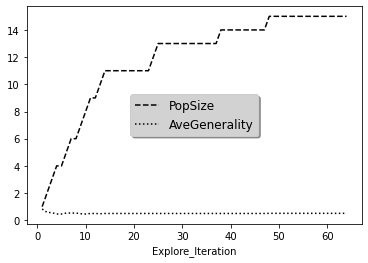

In [11]:
import numpy as np
import matplotlib.pyplot as plt

try:       
    datasetList = [] #np.array([])
    arraylist = np.array([])
    headerList = np.array([])
    ds = open(cons.outFileName+'_LearnTrack.txt','r')  
except Exception as inst:
    print(type(inst))
    print(inst.args)
    print(inst)
    print('cannot open', cons.outFileName+'_LearnTrack.txt')
    raise
else:
    headerList = ds.readline().rstrip('\n').split('\t')   #strip off first row
    for line in ds:
        lineList = line.strip('\n').split('\t')
        arraylist = [float(i) for i in lineList]
        datasetList.append(arraylist)
    ds.close()  


#maybe easier to reshape then use [:,0] but have not tried...
a = [row[0] for row in datasetList]   
b = [row[1] for row in datasetList]  
c = [row[2] for row in datasetList]  
    
# Create plots with pre-defined labels.
plt.plot(a, b, 'k--', label=headerList[1] )
plt.plot(a, c, 'k:', label=headerList[2])


plt.xlabel(headerList[0])
legend = plt.legend(loc='center', shadow=True, fontsize='large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#D2D2D2')

plt.show()